## Web Data Analytics Practical Number 9

Aim: Sentiment analysis for reviews by customers and visualize the same.

In [ ]:
!pip install textblob nltk matplotlib seaborn

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


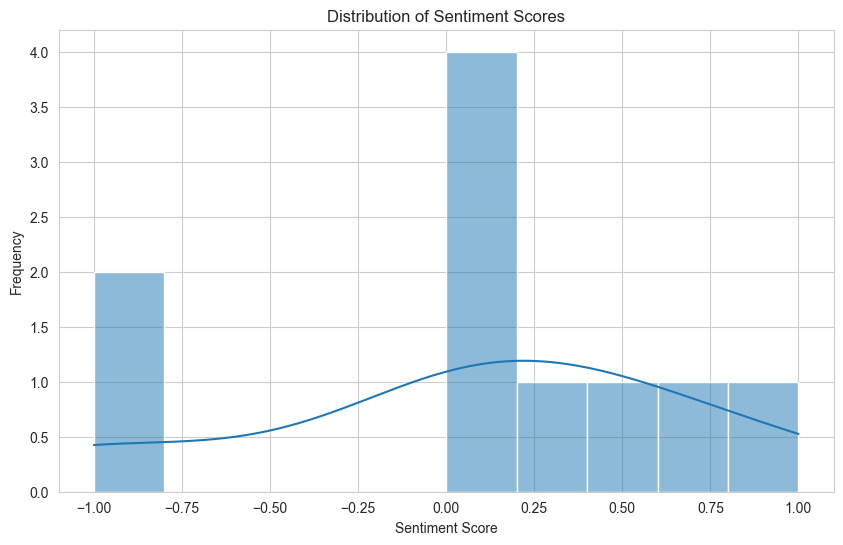

C:\Users\subha\AppData\Local\Temp\ipykernel_5400\3984167406.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='viridis')


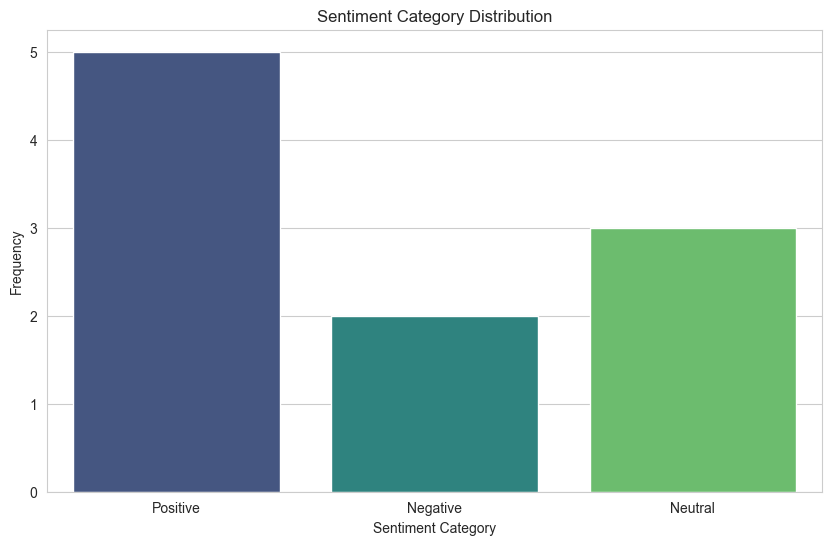

In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')

# Review data
data = {
    'review': [
        "I love this product! It works great.",
        "This is the worst purchase I have ever made.",
        "Not bad, but could be better.",
        "Absolutely fantastic! Highly recommend it.",
        "Terrible experience, will not buy again.",
        "Decent quality for the price.",
        "Exceeded my expectations!",
        "Would not recommend this to anyone.",
        "Satisfactory performance overall.",
        "I'm very happy with my purchase."
    ]
}

df = pd.DataFrame(data)

# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['review'].apply(get_sentiment)

# Plot sentiment distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=10, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Function to categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Plot sentiment category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=df, palette='viridis')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()